 Upload image with shapes :


Saving تصویر صفحه 2025-07-06 133208.png to تصویر صفحه 2025-07-06 133208 (1).png
Image 'تصویر صفحه 2025-07-06 133208 (1).png' loaded.


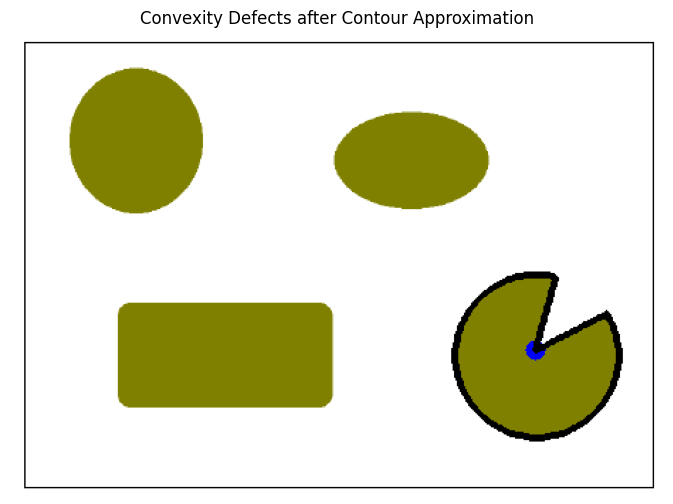

In [12]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
from google.colab import files
import io

# Upload image with noisy shapes
print(" Upload image with shapes :")
uploaded = files.upload()

# Load image
img = None
for name in uploaded:
    img = Image.open(io.BytesIO(uploaded[name])).convert('RGB')
    img = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)
    print(f"Image '{name}' loaded.")

# Function to get contours
def get_contours(img):
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(img_gray, 127, 255, 0)
    contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    return contours

# Clone image for drawing
output = img.copy()

# Process contours
for contour in get_contours(img):
    orig_contour = contour
    epsilon = 0.01 * cv2.arcLength(contour, True)
    contour = cv2.approxPolyDP(contour, epsilon, True)  # Smooth the contour

    if len(contour) > 3:  # Need at least 4 points for defects
        hull = cv2.convexHull(contour, returnPoints=False)
        defects = cv2.convexityDefects(contour, hull)

        if defects is not None:
            for i in range(defects.shape[0]):
                start_idx, end_idx, far_idx, _ = defects[i, 0]
                far = tuple(contour[far_idx][0])
                cv2.circle(output, far, 7, [255, 0, 0], -1)  # Mark defects
            cv2.drawContours(output, [orig_contour], -1, (0, 0, 0), 3)

# Show result
plt.figure(figsize=(10, 6))
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
plt.title("Convexity Defects after Contour Approximation")
plt.axis('off')
plt.show()
